# Support Vector Machine from Scratch (using Numpy)

## Imports

In [809]:
import numpy as np
import pandas as pd # for data initialization
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_breast_cancer
import matplotlib.pyplot as plt

## Initialize Data

In [810]:
bc_data = load_breast_cancer()
df = pd.DataFrame(bc_data.data, columns=bc_data.feature_names)
df['target'] = bc_data.target

In [811]:
X_train, X_test, y_train, y_test = train_test_split(df.drop(columns = ['target']), df['target'], random_state = 0, test_size = 0.2)

In [812]:
def normalize(X):
    mean = np.mean(X, axis = 0)
    std = np.std(X, axis = 0)
    return (X-mean) / std

In [813]:
X_train = normalize(X_train).values
X_test = normalize(X_test).values

y_train = y_train.values
y_test = y_test.values

## Resources

* https://colab.research.google.com/drive/10amh3u9OhefFB0C-3lJo2H53x41I9GnJ?usp=sharing

* https://www.youtube.com/watch?v=WdXapAG6TYo

## SVM Model

In [814]:
class SVM():
    def __init__(self, learning_rate=1e-4, iterations=100, reg_term=0.01):
        self.learning_rate = learning_rate
        self.iterations = iterations
        self.reg_term = reg_term # Regularization Term
        self.costs = [] # Cost History for Gradient Descent Cost Graph

    def fit(self, X, y, stochastic=True):
        # Initialize Size
        self.m, self.n = X.shape

        # Initialize Weights, Bias, X, & y
        self.w = np.zeros(self.n)
        self.b = 0
        self.X = X
        self.y = y

        self.X_transpose = X.T # For Batch Gradient Descent Computational Efficiency

        if stochastic:
            for i in range(self.iterations):
                self.update_weights_sgd()
                self.costs.append(self.cost())
        else:
            for i in range(self.iterations):
                self.update_weights_bgd()
                self.costs.append(self.cost())

    def predict(self, X):
        p = np.dot(X, self.w) + self.b
        p = np.sign(p)
        p = np.where(p <= -1, 0, 1)
        return p

    def update_weights_sgd(self): # Stochastic Gradient Descent

        # Label Encoding
        y_label = np.where(self.y <= 0, -1, 1)

        # For each row in X (index, row values)
        for i, x_i in enumerate(self.X):

            # Gradient Condition
            p = y_label[i] * (np.dot(x_i, self.w) - self.b)

            if p >= 1:
                wg = 2 * self.reg_term * self.w
                bg = 0

            else:
                wg = 2 * self.reg_term * self.w - np.dot(x_i, y_label[i])
                bg = y_label[i]

            # Update Weights
            self.w -= self.learning_rate * wg
            self.b -= self.learning_rate * bg

    def update_weights_bgd(self): # Batch Gradient Descent

        # Label Encoding
        y_label = np.where(self.y <= 0, -1, 1)

        # Create Condition for Gradient and Apply
        p = y_label * (np.dot(self.X, self.w) + self.b) # Raw Prediction (-1, 1)
        hinge_loss_grad = np.where(p >= 1, 0, self.y)

        # Compute and Average Gradients
        wg = (1/ self.m) * 2 * self.reg_term * self.w - np.dot(self.X_transpose, hinge_loss_grad)
        bg = (1 / self.m) * np.sum(hinge_loss_grad)

        # Update
        self.w -= self.learning_rate * wg
        self.b -= self.learning_rate * bg

    def cost(self):
        p = np.dot(self.X, self.w) + self.b
        h_loss = np.sum(np.maximum(0, 1-self.y * p))
        cost = h_loss + 0.5 * np.dot(self.w, self.w)
        return cost

## Accuracy Score

In [815]:
def accuracy_score(y_pred, y_true, r=2):
    y_pred = y_pred.reshape(-1, 1)
    y_true = y_true.reshape(-1, 1)

    acc = (y_pred == y_true).sum() / len(y_true)
    acc = round(acc, r)
    return acc

## Stochastic Gradient Descent

In [816]:
model = SVM()
model.fit(X_train, y_train)
p = model.predict(X_train)
accuracy = accuracy_score(y_train, p)
print(f"Training Accuracy: {accuracy}")
p = model.predict(X_test)
accuracy = accuracy_score(y_test, p)
print(f"Test Accuracy: {accuracy}")

Training Accuracy: 0.97
Test Accuracy: 0.95


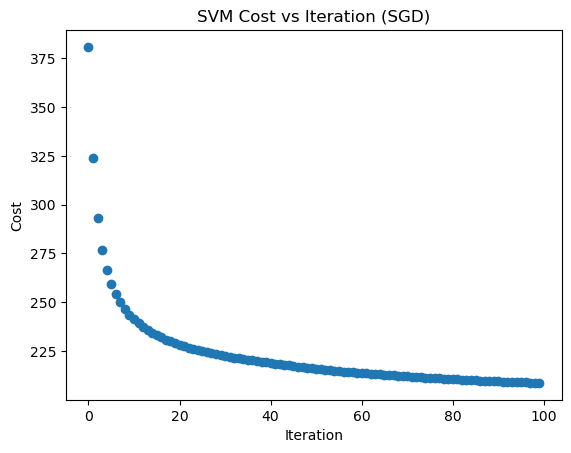

In [817]:
plt.scatter(list(range(len(model.costs))), model.costs)
plt.xlabel("Iteration")
plt.ylabel("Cost")
plt.title("SVM Cost vs Iteration (SGD)")
plt.show()

## Batch Gradient Descent

In [818]:
model = SVM()
model.fit(X_train, y_train, stochastic = False)
p = model.predict(X_train)
accuracy = accuracy_score(y_train, p)
print(f"Training Accuracy: {accuracy}")
p = model.predict(X_test)
accuracy = accuracy_score(y_test, p)
print(f"Test Accuracy: {accuracy}")

Training Accuracy: 0.98
Test Accuracy: 0.95


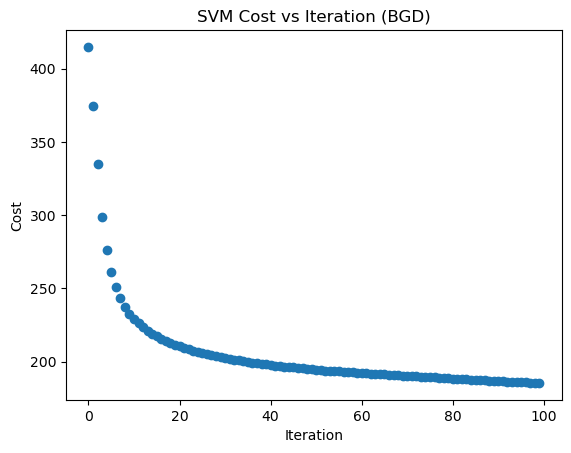

In [819]:
plt.scatter(list(range(len(model.costs))), model.costs)
plt.xlabel("Iteration")
plt.ylabel("Cost")
plt.title("SVM Cost vs Iteration (BGD)")
plt.show()